# Data Description
1. chicago-community-areas.csv from github 
2. use *opencage.geocoder* to get lat, lng
3. "station.csv" is the cleaned combining 1 and 2 
4. Using Foursquare API to get Get top categories , category.csv contains three tiers of category for analysis

In [22]:
# !pip install sklearn
import pandas as pd
import numpy as np
import json
import requests
from bs4 import BeautifulSoup
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re

CLIENT_ID="1QWBEEEJMMQ1TD2ZOOO31GHSEWRJ24N3Y40EHQR2ZEH0PI4A"  # confidential
CLIENT_SECRET="KXTQUUEMPXA1XCMWSEPJ1PN05PCHU0NYNFBHR51LCRA5V3JD" # confidential
VERSION="20191222"
LIMIT=80

### List of Communities and geographical coordinates

In [8]:
chicago_community=pd.read_csv("chicago-community-areas.csv")
chicago_community.head()

,Community Area,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,name,Rogers Park,West Ridge,Uptown,Lincoln Square,North Center,Lake View,Lincoln Park,Near North Side,Edison Park,...,Englewood,Greater Grand Crossing,Ashburn,Auburn Gresham,Beverly,Washington Heights,Mount Greenwood,Morgan Park,O'Hare,Edgewater
1,population,54991,71942,56362,39493,31867,94368,64116,80484,11187,...,30654,32602,41081,48743,20034,26493,19093,22544,12756,56521
2,income,39482,47323,40324,57749,81524,70746,82707,76290,77678,...,19743,29663,62238,34767,83092,42053,80505,56886,49601,43331
3,requests,3204.8880725907,3906.3412193156,2164.0466981295,3827.2605271849,5307.9988703031,2742.2431332668,3408.6655437027,1717.6084687635,4754.6259050653,...,5459.646375673,6296.85295381,5599.4255251814,5785.446115344,6985.125287016,6641.7544256946,4357.6179751737,6264.1944641542,1552.9946691765,2564.8873869877
4,latinos,0.244,0.204,0.142,0.191,0.136,0.076,0.056,0.049,0.078,...,0.011,0.012,0.368,0.009,0.046,0.01,0.072,0.027,0.095,0.165


In [9]:
chicago_community = chicago_community.transpose().loc['1':'77', [0, 1, 2]].reset_index(drop=True)
chicago_community.columns = ['Community', 'Population', 'Income']
chicago_community.head()

,Community,Population,Income
0,Rogers Park,54991,39482
1,West Ridge,71942,47323
2,Uptown,56362,40324
3,Lincoln Square,39493,57749
4,North Center,31867,81524


In [10]:
# !pip3 install opencage
# use alternative geocoder for getting lat lng 
from opencage.geocoder import OpenCageGeocode
key = '20b19d9ca52c4af8b4ee86a53b693aa6'
geocoder = OpenCageGeocode(key)

In [11]:
com_dict={}
import time
start = time.time()

for i in chicago_community.Community:
    address = i + ', ' + 'Chicago, Illinois,United States'
    location = geocoder.geocode(address)
    latlng = location[0]['geometry']
    com_dict[i]=latlng
    print(i,latlng,str(time.time()-start)+'s')
com_dict

Rogers Park {'lat': 42.0105314, 'lng': -87.6707482} 3.6741042137145996s
West Ridge {'lat': 42.0035482, 'lng': -87.6962426} 9.297595024108887s
Uptown {'lat': 41.9666299, 'lng': -87.6555458} 14.841290950775146s
Lincoln Square {'lat': 41.9759898, 'lng': -87.6896163} 20.83829092979431s
North Center {'lat': 41.9561073, 'lng': -87.6791596} 23.87533402442932s
Lake View {'lat': 41.94705, 'lng': -87.6554288} 30.63710117340088s
Lincoln Park {'lat': 41.9402976, 'lng': -87.6381171} 33.35074210166931s
Near North Side {'lat': 41.9000327, 'lng': -87.6344975} 36.60873293876648s
Edison Park {'lat': 42.0057335, 'lng': -87.8140037} 44.71277904510498s
Norwood Park {'lat': 41.9855895, 'lng': -87.8005772} 46.70323204994202s
Jefferson Park {'lat': 41.9697375, 'lng': -87.7631179} 49.489869117736816s
Forest Glen {'lat': 41.9917516, 'lng': -87.751674} 51.41935110092163s
North Park {'lat': 41.9849547, 'lng': -87.7229344} 58.05933117866516s
Albany Park {'lat': 41.9719367, 'lng': -87.7161739} 62.94059228897095s
Po

{'Rogers Park': {'lat': 42.0105314, 'lng': -87.6707482},
 'West Ridge': {'lat': 42.0035482, 'lng': -87.6962426},
 'Uptown': {'lat': 41.9666299, 'lng': -87.6555458},
 'Lincoln Square': {'lat': 41.9759898, 'lng': -87.6896163},
 'North Center': {'lat': 41.9561073, 'lng': -87.6791596},
 'Lake View': {'lat': 41.94705, 'lng': -87.6554288},
 'Lincoln Park': {'lat': 41.9402976, 'lng': -87.6381171},
 'Near North Side': {'lat': 41.9000327, 'lng': -87.6344975},
 'Edison Park': {'lat': 42.0057335, 'lng': -87.8140037},
 'Norwood Park': {'lat': 41.9855895, 'lng': -87.8005772},
 'Jefferson Park': {'lat': 41.9697375, 'lng': -87.7631179},
 'Forest Glen': {'lat': 41.9917516, 'lng': -87.751674},
 'North Park': {'lat': 41.9849547, 'lng': -87.7229344},
 'Albany Park': {'lat': 41.9719367, 'lng': -87.7161739},
 'Portage Park': {'lat': 41.9578093, 'lng': -87.7650594},
 'Irving Park': {'lat': 41.953365, 'lng': -87.7364471},
 'Dunning': {'lat': 41.952809, 'lng': -87.7964493},
 'Montclare': {'lat': 41.9253091, '

In [12]:
latlng=pd.DataFrame.from_dict(com_dict,orient='index').reset_index()
latlng.columns=['Community','latitude','longitude']
latlng.head()

,Community,latitude,longitude
0,Rogers Park,42.010531,-87.670748
1,West Ridge,42.003548,-87.696243
2,Uptown,41.966630,-87.655546
3,Lincoln Square,41.975990,-87.689616
4,North Center,41.956107,-87.679160


In [13]:
chicago_community=pd.merge(chicago_community,latlng,how='left', on=['Community'])

In [17]:
chicago_community.head()
# print(chicago_community.shape)
# (77,5)
chicago_community.to_csv("chicago_community.csv")

In [18]:
# reading saved data
chicago_community = pd.read_csv("chicago_community.csv", index_col=0)

In [19]:
chicago_community.head()

,Community,Population,Income,latitude,longitude
0,Rogers Park,54991,39482,42.010531,-87.670748
1,West Ridge,71942,47323,42.003548,-87.696243
2,Uptown,56362,40324,41.966630,-87.655546
3,Lincoln Square,39493,57749,41.975990,-87.689616
4,North Center,31867,81524,41.956107,-87.679160


In [21]:
#create map of Chicago with all neighbourhood
# 41.8781° N, 87.6298° W
map_chicago_com = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
#add markers
for community, lat, lng in zip(chicago_community['Community'], chicago_community['latitude'],chicago_community['longitude']):
    folium.Circle(
        [lat,lng],
        popup=community,
        radius=20,
        color='red'
    ).add_to(map_chicago_com)  
map_chicago_com

### Exploratory Data Analysis
Using Foursquare API to get Get top categories and explore

In [23]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url,timeout=10).json()

In [24]:
len(results['response']['categories'])

10

In [25]:
categories_list = []
# print the top 5 categories and their IDs and add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)
categories_list = categories_list[:5]

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [26]:
categories_list

[('Arts & Entertainment', '4d4b7104d754a06370d81259'),
 ('College & University', '4d4b7105d754a06372d81259'),
 ('Event', '4d4b7105d754a06373d81259'),
 ('Food', '4d4b7105d754a06374d81259'),
 ('Nightlife Spot', '4d4b7105d754a06376d81259')]

In [29]:
###### get Nearby Venues
def getNearbyVenues(names, latitudes, longitudes, radius=2000,Limit=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&intent=browse&categoryId=4d4b7104d754a06370d81259&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], 
            v['venue']['location']['lat'], v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Community', 'Community Latitude', 'Community Longitude', 
                  'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [30]:
chicago_art_venues = getNearbyVenues(names=chicago_community['Community'],latitudes=chicago_community['latitude'],longitudes=chicago_community['longitude'])
print(chicago_art_venues.shape)
chicago_art_venues.head()

Rogers Park
West Ridge
Uptown
Lincoln Square
North Center
Lake View
Lincoln Park
Near North Side
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Albany Park
Portage Park
Irving Park
Dunning
Montclare
Belmont Cragin
Hermosa
Avondale
Logan Square
Humboldt Park
West Town
Austin
West Garfield Park
East Garfield Park
Near West Side
North Lawndale
South Lawndale
Lower West Side
Loop
Near South Side
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
Bridgeport
New City
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
West Englewood
Englewood
Greater Grand Crossing
Ashburn
Auburn Gresham
Beverly
Washington Heights
Mount Greenwood
Morgan Park
O'Hare
Edgewater
(1540, 7)


,Community,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rogers Park,42.010531,-87.670748,Lifeline Theatre,42.007372,-87.666284,Theater
1,Rogers Park,42.010531,-87.670748,Mayne Stage,42.007975,-87.665140,Concert Hall
2,Rogers Park,42.010531,-87.670748,Leather Archives & Museum,41.998608,-87.667902,History Museum
3,Rogers Park,42.010531,-87.670748,New 400 Theaters,42.004664,-87.661295,Movie Theater
4,Rogers Park,42.010531,-87.670748,Raven Theatre Complex,41.994323,-87.669931,Theater


In [31]:
chicago_art_venues.to_csv('chicago_art_venues.csv')

In [32]:
# chicago_venues.to_csv('chicago_venues')
chicago_art_venues = pd.read_csv('chicago_art_venues.csv',index_col=0)
chicago_art_venues.head()

,Community,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rogers Park,42.010531,-87.670748,Lifeline Theatre,42.007372,-87.666284,Theater
1,Rogers Park,42.010531,-87.670748,Mayne Stage,42.007975,-87.665140,Concert Hall
2,Rogers Park,42.010531,-87.670748,Leather Archives & Museum,41.998608,-87.667902,History Museum
3,Rogers Park,42.010531,-87.670748,New 400 Theaters,42.004664,-87.661295,Movie Theater
4,Rogers Park,42.010531,-87.670748,Raven Theatre Complex,41.994323,-87.669931,Theater


In [33]:
chicago_art_venues.groupby("Venue Category")['Venue'].count().nlargest(20)

Venue Category
Art Gallery              275
Theater                  269
Dance Studio             193
Music Venue              158
Museum                    68
History Museum            64
Movie Theater             54
Science Museum            53
Performing Arts Venue     47
Comedy Club               40
Outdoor Sculpture         37
Concert Hall              35
Public Art                32
Indie Movie Theater       25
Jazz Club                 24
Multiplex                 24
Art Museum                23
Rock Club                 18
Exhibit                   12
Indie Theater             12
Name: Venue, dtype: int64

In [35]:
map_chicago_art = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# add markers to map
for lat, lng, station,venue in zip(chicago_art_venues['Venue Latitude'], 
                                           chicago_art_venues['Venue Longitude'], 
                                            chicago_art_venues['Community'], 
                                            chicago_art_venues['Venue']):
    label = '{},{}'.format(station,
                              venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_chicago_art)  

map_chicago_art
map_chicago_art.save("map_chicago_art_map.html")

In [36]:
# print(" number of level 1 categories: " ,len(chicago_venues['Venue Category'].unique()))
print(" number of art & entertainment categories: " ,len(chicago_art_venues['Venue Category'].unique()))
print(chicago_art_venues.shape)

 number of art & entertainment categories:  35
(1540, 7)


## Classification

In [38]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_art_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Community'] = chicago_art_venues['Community'] 

# move neighborhood column to the first column
columns = chicago_onehot.columns.values.tolist()
columns.sort(key = 'Community'.__eq__)
chicago_onehot = chicago_onehot[columns]

chicago_grouped = chicago_onehot.groupby('Community').sum().reset_index()
chicago_grouped.head()

,Community,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Dance Studio,Disc Golf,...,Piano Bar,Planetarium,Public Art,Rock Club,Roller Rink,Science Museum,Street Art,Theater,Tour Provider,Zoo Exhibit
0,Albany Park,0,1,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,1,0,0
1,Archer Heights,0,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Armour Square,0,17,0,0,0,0,1,6,1,...,0,0,1,1,0,0,0,9,0,0
3,Ashburn,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Auburn Gresham,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
community_venues_sorted = pd.DataFrame(columns=columns)
community_venues_sorted['Community'] = chicago_grouped['Community']

for ind in np.arange(chicago_grouped.shape[0]):
    community_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

community_venues_sorted.head()

,Community,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Dance Studio,Theater,Art Gallery,Museum,Music Venue,Exhibit,Indie Theater,Indie Movie Theater,History Museum,Go Kart Track
1,Archer Heights,Concert Hall,Dance Studio,Theater,Movie Theater,Music Venue,Exhibit,Indie Theater,Indie Movie Theater,History Museum,Go Kart Track
2,Armour Square,Art Gallery,Theater,Dance Studio,History Museum,Music Venue,Concert Hall,Disc Golf,Memorial Site,Rock Club,Public Art
3,Ashburn,Multiplex,History Museum,Dance Studio,Zoo Exhibit,Exhibit,Jazz Club,Indie Theater,Indie Movie Theater,Go Kart Track,Disc Golf
4,Auburn Gresham,Music Venue,Dance Studio,Zoo Exhibit,Exhibit,Jazz Club,Indie Theater,Indie Movie Theater,History Museum,Go Kart Track,Disc Golf


####  10 Most Frequently Occuring Venue Category


In [43]:
# create a dataframe of top 10 categories
chicago_top_10 = chicago_art_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
chicago_top_10=chicago_top_10.reset_index()
#Tokyo_5_Dist_Venues_Top10

chicago_top_10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
chicago_top_10

,Venue Category,Frequency
0,Art Gallery,275
1,Theater,269
2,Dance Studio,193
3,Music Venue,158
4,Museum,68
5,History Museum,64
6,Movie Theater,54
7,Science Museum,53
8,Performing Arts Venue,47
9,Comedy Club,40


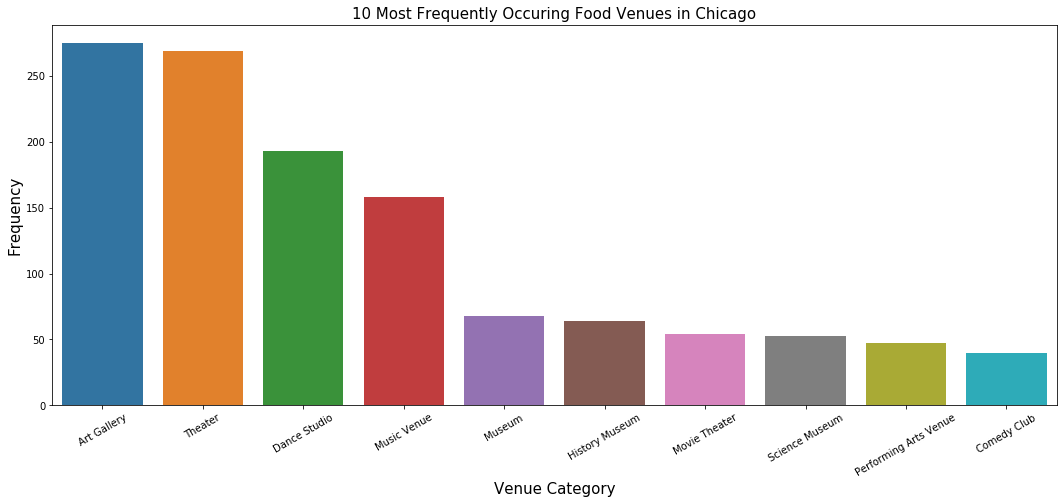

In [44]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=chicago_top_10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Food Venues in Chicago', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most Freq Food Venues.png", dpi=300)
plt.show()

Art Gallery is one of the Most Frequent Venues in Chicago.


In [45]:
num_top_venues = 5

for places in chicago_grouped['Community']:
    print("****** "+places+" ******")
    temp = chicago_grouped[chicago_grouped['Community'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

****** Albany Park ******
          Venue  Freq
0  Dance Studio   4.0
1   Art Gallery   1.0
2        Museum   1.0
3       Theater   1.0
4   Music Venue   1.0


****** Archer Heights ******
           Venue  Freq
0   Concert Hall   2.0
1  Movie Theater   1.0
2        Theater   1.0
3    Music Venue   1.0
4   Dance Studio   1.0


****** Armour Square ******
            Venue  Freq
0     Art Gallery  17.0
1         Theater   9.0
2    Dance Studio   6.0
3     Music Venue   3.0
4  History Museum   3.0


****** Ashburn ******
            Venue  Freq
0       Multiplex   2.0
1    Dance Studio   1.0
2  History Museum   1.0
3    Amphitheater   0.0
4     Planetarium   0.0


****** Auburn Gresham ******
          Venue  Freq
0   Music Venue   1.0
1  Dance Studio   1.0
2  Amphitheater   0.0
3   Planetarium   0.0
4        Museum   0.0


****** Austin ******
         Venue  Freq
0  Art Gallery   1.0
1    Rock Club   1.0
2    Disc Golf   1.0
3  Planetarium   0.0
4       Museum   0.0


****** Avalon Par

4   Music Venue   0.0


****** Washington Park ******
                   Venue  Freq
0                Theater   4.0
1         History Museum   3.0
2             Art Museum   2.0
3  Performing Arts Venue   2.0
4          Movie Theater   2.0


****** West Elsdon ******
            Venue  Freq
0         Theater   1.0
1    Dance Studio   1.0
2  History Museum   1.0
3    Amphitheater   0.0
4     Planetarium   0.0


****** West Englewood ******
                   Venue  Freq
0          Movie Theater   1.0
1            Music Venue   1.0
2    Indie Movie Theater   1.0
3  Performing Arts Venue   1.0
4           Amphitheater   0.0


****** West Garfield Park ******
         Venue  Freq
0   Public Art   1.0
1  Planetarium   0.0
2       Museum   0.0
3  Music Venue   0.0
4  Opera House   0.0


****** West Lawn ******
            Venue  Freq
0  History Museum   2.0
1       Multiplex   1.0
2   Movie Theater   0.0
3          Museum   0.0
4     Music Venue   0.0


****** West Pullman ******
           

### Clusters

The Elbow Method - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.


In [46]:
chicago_grouped

,Community,Amphitheater,Art Gallery,Art Museum,Arts & Entertainment,Circus,Comedy Club,Concert Hall,Dance Studio,Disc Golf,...,Piano Bar,Planetarium,Public Art,Rock Club,Roller Rink,Science Museum,Street Art,Theater,Tour Provider,Zoo Exhibit
0,Albany Park,0,1,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,1,0,0
1,Archer Heights,0,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Armour Square,0,17,0,0,0,0,1,6,1,...,0,0,1,1,0,0,0,9,0,0
3,Ashburn,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Auburn Gresham,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Austin,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,Avalon Park,0,1,0,1,0,0,0,5,0,...,0,0,0,0,0,0,0,2,0,0
7,Avondale,0,11,0,0,1,0,2,12,0,...,1,0,1,0,0,0,0,7,0,0
8,Belmont Cragin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
9,Beverly,0,3,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
sum_of_squared_distances = []
chicago_grouped_clustering = chicago_grouped.drop('Community', 1)

K = range(1,10)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(chicago_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 

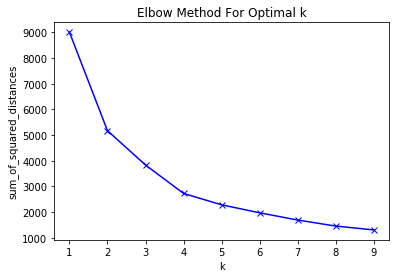

In [48]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [49]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,10)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(chicago_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(chicago_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 

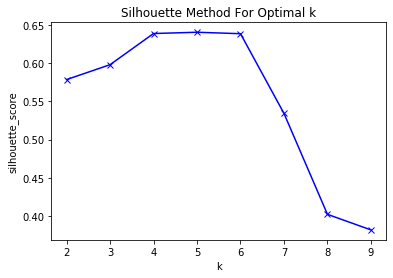

In [50]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


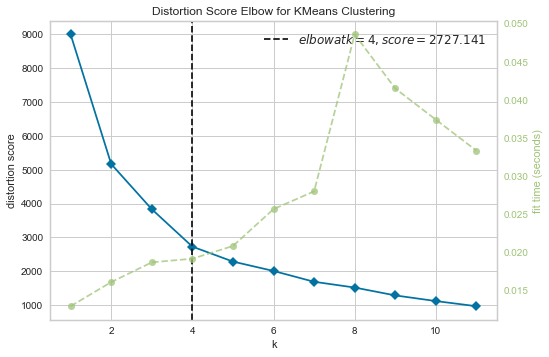

In [51]:
# !pip install yellowbrick
###### select K clusters
import yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


# KElbowVisual4ize
visualizer = KElbowVisualizer(kmeans, k=(1, 12), metric='distortion')
visualizer.fit(chicago_grouped_clustering)        
visualizer.show()

###### the cluster should be 4

In [54]:
# set number of clusters
kclusters = 4

chicago_grouped_clustering = chicago_grouped.drop('Community', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1,).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
#len(kmeans.labels_)#=16
chicago_merged = community_venues_sorted

# add clustering labels
chicago_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago to add latitude/longitude for each neighborhood
chicago_merged = pd.merge(chicago_community, chicago_merged,left_on='Community',right_on='Community')
chicago_merged.groupby('Cluster Labels')['Community'].count()

Cluster Labels
0    57
1     8
2     9
3     2
Name: Community, dtype: int64

In [55]:
chicago_merged.shape

(76, 16)

In [59]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[41.8781, -87.6298], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
color= ['#8000ff', '#00b5eb', '#80ffb4', '#ff0000']



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['latitude'], chicago_merged['longitude'], chicago_merged['Community'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=color[cluster-1],
        fill=True,
        fill_color=color[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [60]:
grouped = chicago_merged[['Community',
                     'Cluster Labels',
                     '1st Most Common Venue', 
                     '2nd Most Common Venue', 
                     '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue',
                    '6th Most Common Venue'
                    ]]

grouped.loc[:, 'Top Venues'] = grouped.apply(lambda x: ", ".join(x.iloc[2:5]), axis=1)
grouped = grouped.drop(['1st Most Common Venue', 
                        '2nd Most Common Venue', 
                        '3rd Most Common Venue',
                     '4th Most Common Venue',
                     '5th Most Common Venue','6th Most Common Venue'], axis=1)
def mix(group):
    return ', '.join(group['Top Venues'].tolist())
top_venues = grouped.groupby('Cluster Labels').apply(mix)

c0dist = grouped.groupby('Cluster Labels').get_group(0).shape[0]
clr0 = pd.Series(top_venues[0].split(', '), name='Cluster 0').value_counts().nlargest(6)/c0dist
c1dist = grouped.groupby('Cluster Labels').get_group(1).shape[0]
clr1 = pd.Series(top_venues[1].split(', '), name='Cluster 1').value_counts().nlargest(6)/c1dist
c2dist = grouped.groupby('Cluster Labels').get_group(2).shape[0]
clr2 = pd.Series(top_venues[2].split(', '), name='Cluster 2').value_counts().nlargest(6)/c2dist
c3dist = grouped.groupby('Cluster Labels').get_group(3).shape[0]
clr3 = pd.Series(top_venues[3].split(', '), name='Cluster 3').value_counts().nlargest(6)/c2dist

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

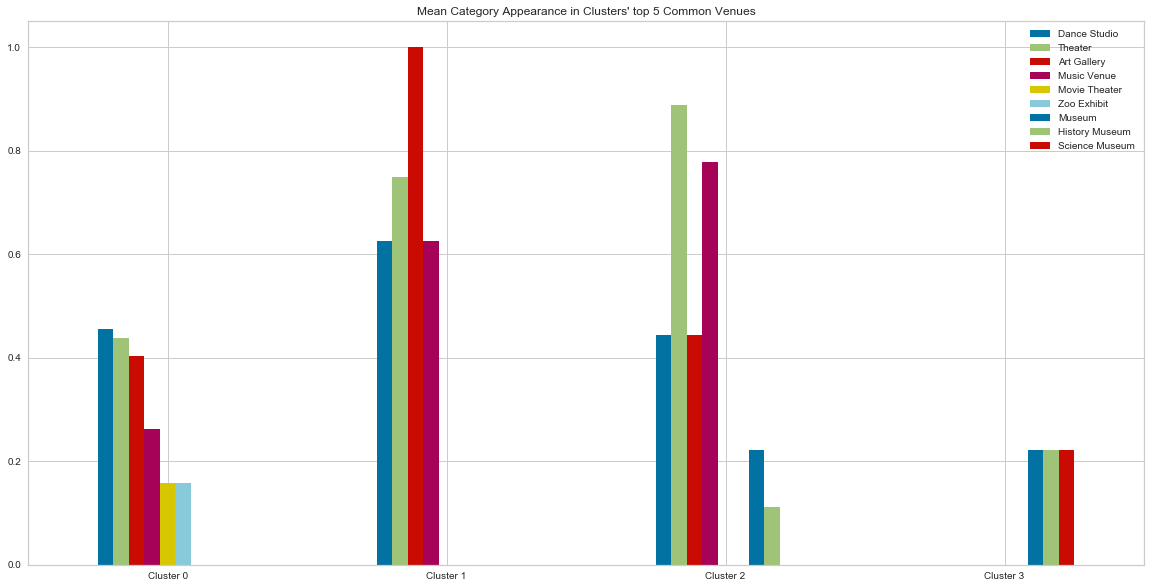

In [61]:
ax = pd.concat([clr0,clr1,clr2, clr3], sort=False, axis=1).transpose().plot(kind='bar', figsize=(20, 10))
plt.title("Mean Category Appearance in Clusters' top 5 Common Venues") 
plt.xticks(rotation=0)

In [64]:
chicago_merged.head()

,Community,Population,Income,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Rogers Park,54991,39482,42.010531,-87.670748,Theater,Movie Theater,History Museum,Dance Studio,Indie Theater,Art Gallery,Arts & Entertainment,Concert Hall,Performing Arts Venue,Exhibit,0
1,West Ridge,71942,47323,42.003548,-87.696243,Dance Studio,Theater,Art Gallery,Disc Golf,Jazz Club,Indie Theater,Indie Movie Theater,History Museum,Go Kart Track,Exhibit,0
2,Uptown,56362,40324,41.966630,-87.655546,Theater,Music Venue,Dance Studio,Art Gallery,Indie Theater,Comedy Club,Museum,Concert Hall,Indie Movie Theater,Public Art,2
3,Lincoln Square,39493,57749,41.975990,-87.689616,Theater,Art Gallery,Music Venue,Museum,Dance Studio,Performing Arts Venue,Indie Theater,History Museum,Movie Theater,Multiplex,2
4,North Center,31867,81524,41.956107,-87.679160,Theater,Music Venue,Dance Studio,Comedy Club,Art Gallery,Movie Theater,Public Art,Performing Arts Venue,Outdoor Sculpture,Indie Theater,2


In [65]:
cluster_0 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[:13]]
cluster_0 = cluster_0
cluster_0.head(5)

,Community,Population,Income,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Rogers Park,54991,39482,42.010531,-87.670748,Theater,Movie Theater,History Museum,Dance Studio,Indie Theater,Art Gallery,Arts & Entertainment,Concert Hall
1,West Ridge,71942,47323,42.003548,-87.696243,Dance Studio,Theater,Art Gallery,Disc Golf,Jazz Club,Indie Theater,Indie Movie Theater,History Museum
8,Edison Park,11187,77678,42.005734,-87.814004,Dance Studio,Theater,Indie Movie Theater,Disc Golf,Jazz Club,Indie Theater,History Museum,Go Kart Track
9,Norwood Park,37023,64477,41.985590,-87.800577,Disc Golf,Music Venue,History Museum,Dance Studio,Exhibit,Jazz Club,Indie Theater,Indie Movie Theater
10,Jefferson Park,25448,60592,41.969738,-87.763118,Dance Studio,Theater,Art Museum,Music Venue,Concert Hall,Exhibit,Indie Theater,Indie Movie Theater


In [78]:
required_column_indices = [0,5,6]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [0,5,6]

for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Edison Park               1
Calumet Heights           1
O'Hare                    1
Beverly                   1
West Ridge                1
East Side                 1
Roseland                  1
Portage Park              1
Riverdale                 1
Auburn Gresham            1
North Park                1
East Garfield Park        1
West Garfield Park        1
Rogers Park               1
Clearing                  1
Burnside                  1
Washington Park           1
West Lawn                 1
North Lawndale            1
Avalon Park               1
Garfield Ridge            1
Greater Grand Crossing    1
Englewood                 1
Archer Heights            1
Morgan Park               1
Ashburn                   1
Forest Glen               1
Grand Boulevard           1
South Shore               1
South Chicago             1
Hermosa                   1
Montclare                 1
Hegewisch                 1
Humboldt Park             1
Brighton Park             1
West Pullman        

In [70]:
cluster_1 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[:16]]
cluster_1 = cluster_1
cluster_1.head(5)

,Community,Population,Income,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
20,Avondale,39262,46519,41.938921,-87.711168,Dance Studio,Art Gallery,Theater,Music Venue,Performing Arts Venue,Concert Hall,Indie Movie Theater,Go Kart Track,Museum,Jazz Club,1
21,Logan Square,72791,49610,41.925221,-87.701310,Dance Studio,Art Gallery,Music Venue,Theater,Performing Arts Venue,Indie Movie Theater,Go Kart Track,Movie Theater,Museum,Concert Hall,1
23,West Town,82236,60720,41.901421,-87.686166,Art Gallery,Theater,Music Venue,Dance Studio,Performing Arts Venue,Art Museum,Rock Club,Movie Theater,History Museum,Museum,1
27,Near West Side,54881,62770,41.880066,-87.666762,Art Gallery,Theater,Dance Studio,Music Venue,Outdoor Sculpture,Concert Hall,Museum,Performing Arts Venue,Movie Theater,History Museum,1
29,South Lawndale,79288,33593,41.838215,-87.713273,Art Gallery,Music Venue,Dance Studio,Concert Hall,Museum,Theater,Street Art,Rock Club,Arts & Entertainment,Circus,1


In [71]:
required_column_indices = [0,5,6]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [0,5,6]

for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

South Lawndale     1
Armour Square      1
Avondale           1
Lower West Side    1
Logan Square       1
Near West Side     1
Bridgeport         1
West Town          1
Name: Community, dtype: int64
---------------------------------------------
Art Gallery     6
Dance Studio    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Theater        5
Art Gallery    2
Music Venue    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


In [73]:
cluster_2 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[:16]]
cluster_2 = cluster_2
cluster_2.head(5)

,Community,Population,Income,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
2,Uptown,56362,40324,41.966630,-87.655546,Theater,Music Venue,Dance Studio,Art Gallery,Indie Theater,Comedy Club,Museum,Concert Hall,Indie Movie Theater,Public Art,2
3,Lincoln Square,39493,57749,41.975990,-87.689616,Theater,Art Gallery,Music Venue,Museum,Dance Studio,Performing Arts Venue,Indie Theater,History Museum,Movie Theater,Multiplex,2
4,North Center,31867,81524,41.956107,-87.679160,Theater,Music Venue,Dance Studio,Comedy Club,Art Gallery,Movie Theater,Public Art,Performing Arts Venue,Outdoor Sculpture,Indie Theater,2
5,Lake View,94368,70746,41.947050,-87.655429,Theater,Music Venue,Comedy Club,Dance Studio,Outdoor Sculpture,Art Gallery,Performing Arts Venue,Indie Movie Theater,Rock Club,Public Art,2
6,Lincoln Park,64116,82707,41.940298,-87.638117,Theater,Music Venue,Art Gallery,Comedy Club,Zoo Exhibit,Outdoor Sculpture,Performing Arts Venue,Dance Studio,Movie Theater,Indie Movie Theater,2


In [74]:
required_column_indices =  [0,5,6]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices =  [0,5,6]

for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Near North Side    1
Uptown             1
North Center       1
Edgewater          1
Lake View          1
Lincoln Square     1
Lincoln Park       1
Near South Side    1
Loop               1
Name: Community, dtype: int64
---------------------------------------------
Theater           8
History Museum    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Music Venue    6
Art Gallery    2
Museum         1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


In [75]:
cluster_3 = chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[:16]]
cluster_3 = cluster_3
cluster_3.head(5)

,Community,Population,Income,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
40,Hyde Park,25681,45335,41.794225,-87.592562,Science Museum,Museum,History Museum,Theater,Exhibit,Movie Theater,Outdoor Sculpture,Art Museum,Art Gallery,Public Art,3
41,Woodlawn,23740,27413,41.779479,-87.599493,Science Museum,Museum,History Museum,Exhibit,Movie Theater,Outdoor Sculpture,Art Museum,Theater,Public Art,Planetarium,3


In [76]:
required_column_indices =  [0,5,6]
required_column = [list(chicago_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [0,5,6]

for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Woodlawn     1
Hyde Park    1
Name: Community, dtype: int64
---------------------------------------------
Science Museum    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Museum    2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


Cluster3: Green 